In [1]:
import json
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import os
import re
import h5py
import json
import pandas as pd
from discrete_vae import *
from tabulate import tabulate

from generate_captions import CaptionGenerator

In [2]:
capgen = CaptionGenerator()
capgen.ds_names

['open_images', 'indoor', 'food', 'svhn', 'stl']

## COCO Dataset

In [2]:
def get_coco_captions(captions_path):
  with open(captions_path, "r") as f:
    cap2017 = json.load(f)
  captions = {}
  dropped = []
  for x in cap2017["annotations"]:
    id_ = str(x["image_id"])
    id_ = "0"*(12-len(id_))+id_
    path = "../fast-ai-coco/train2017/"+id_+".jpg"
    if not os.path.exists(path):
      dropped.append(path)
      continue

    key = "coco_"+str(x["image_id"])
    captions.setdefault(key, {
      "caption": "",
      "path": path
    })
    captions[key]["caption"] += " " + x["caption"]
  return captions, dropped

In [14]:
coco_train, coco_droppped_train = get_coco_captions("../fast-ai-coco/annotations/captions_train2017.json")
coco_val, coco_droppped_val = get_coco_captions("../fast-ai-coco/annotations/captions_val2017.json")

In [15]:
rnd = np.random.choice(list(coco_train.keys()), size = (10))
print(rnd)

['coco_395214' 'coco_126947' 'coco_177941' 'coco_286055' 'coco_132861'
 'coco_496386' 'coco_83987' 'coco_329318' 'coco_500139' 'coco_381366']


 two pizzas on plates on a dining table with a pink design table cloth There were two pizzas on the table ready to eat. Picture of two pizza pies on a date Two pizzas are on a table and a person is on the other side of the table. two white plates with pizza a pitcher of wine some glasses and silverware


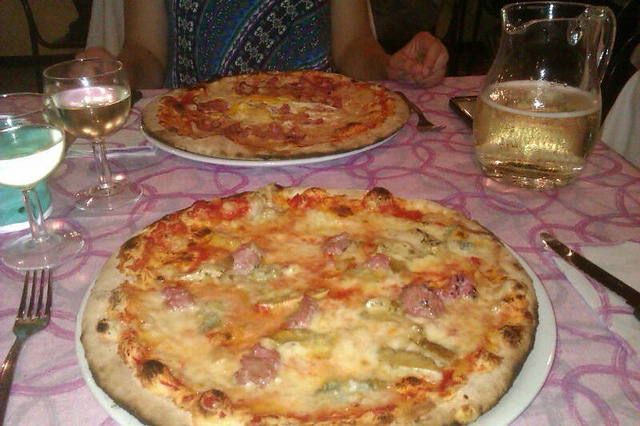

In [16]:
x = coco_train[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## Visual Genome

In [10]:
def get_genome_captions(root_folder = "../VG_100K_2"):
  with open(f"{root_folder}/region_descriptions.json", "r") as f:
    regdes = json.load(f)
    
  captions = {}
  dropped = []
  for item in regdes:
    id = item["id"]
    path = f"../VG_100K_2/VG_100K/{id}.jpg"
    if not os.path.exists(path):
      path = f"../VG_100K_2/VG_100K_2/{id}.jpg"
    if not os.path.exists(path):
      dropped.append(id)
      continue
    captions["genome_"+str(item["id"])] = {
      "caption":" ".join([x["phrase"] for x in item["regions"]]),
      "path": path
    }
    
  return captions, dropped

In [11]:
genome_captions, dropped_genome = get_genome_captions()
rnd = np.random.choice(list(genome_captions.keys()), size = (10))
print(rnd)

['genome_2318221' 'genome_2335691' 'genome_497974' 'genome_2353459'
 'genome_2336615' 'genome_2316525' 'genome_2381972' 'genome_2366248'
 'genome_2347664' 'genome_2350353']


orange and white pylon a group of three pylons white lines on the ground bright green leaves black number three circular light on the front of the truck large windshield on the front of the truck vent on the front of the truck front seat is empty vent on the front of the truck SUV is dark colored reflection on the window window on the side of the vehicle light green leaves on the tree black number 3 a white large truck a set of poles the poles are orange purple trim on truck red trim on the truck a tan bus on the side a pair of windshield wipers number on the truck lights on the truck vent on the truck a large boulder a brown motor home a large white truck orange traffic cones rocks on the hill a tree behind the motor home a black truck the windshield on the motor home the side mirror on the motor home Poles are orange color. Poles are in road. White lines in the road. Car is black color. Car is standing behind the bus. Bus is brown color. Truck is white color. Rocks are behind the veh

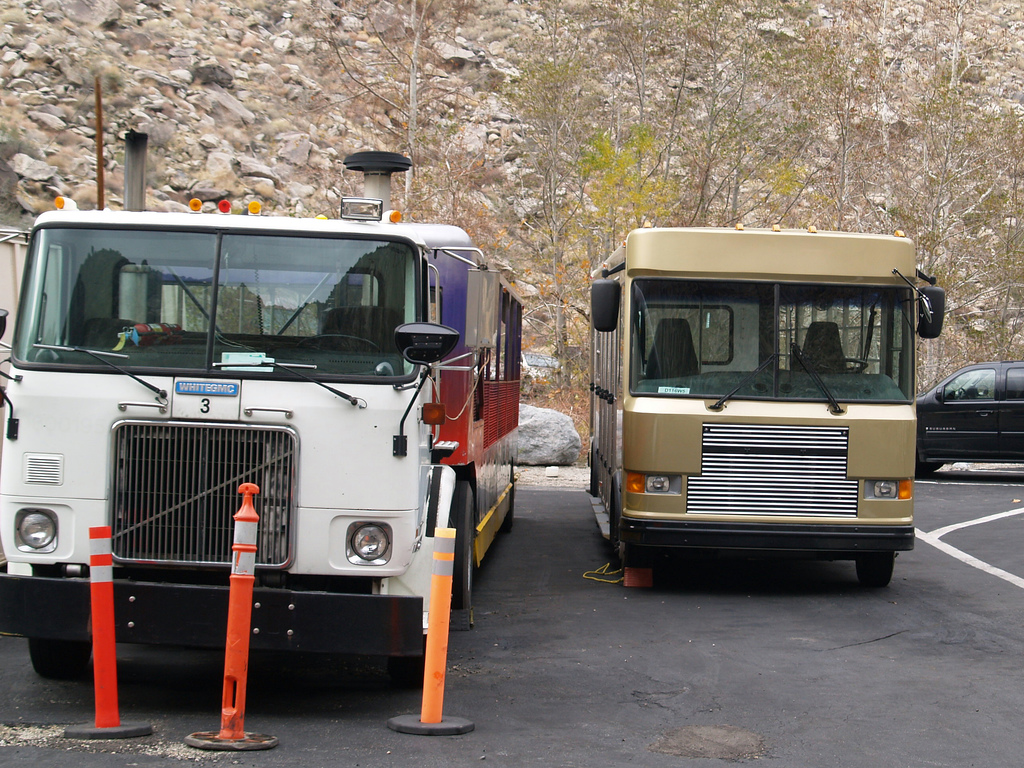

In [13]:
x = genome_captions[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## Flickr30k

In [17]:
def get_flickr30k_captions(rf="../flickr30k_images"):
  data = pd.read_csv(f"{rf}/flickr30k_images/results.csv", sep="|")
  captions = {}
  dropped = []
  for idx, (img_id, df_sub) in enumerate(data.groupby("image_name")):
    path = f"../flickr30k_images/flickr30k_images/{img_id}"
    if not os.path.exists(path):
      dropped.append(path)
      continue
    captions[f"flickr_{idx}"] = {
      "caption": " ".join([str(x) for x in df_sub[" comment"].values.tolist()]),
      "path": path
    }
  return captions, dropped

In [18]:
captions_flickr, dropped_flickr = get_flickr30k_captions()

In [19]:
rnd = np.random.choice(list(captions_flickr.keys()), size = (10))
print(rnd)

['flickr_14067' 'flickr_4437' 'flickr_3013' 'flickr_26763' 'flickr_28995'
 'flickr_2684' 'flickr_26370' 'flickr_25759' 'flickr_30136' 'flickr_28411']


 A man in glasses and a white shirt is playing the electric guitar .  Man in white polo t-shirt with glasses plays a red guitar .  A man with glasses and a white shirt playing a red guitar .  A man in a white collared shirt plays a red guitar .  A man with glasses playing a guitar .


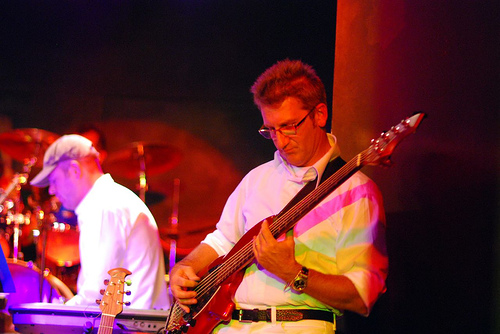

In [20]:
x = captions_flickr[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## Indoor CVPR

In [24]:
def get_indoor_cvpr(rf= "../indoor/"):
  indoor = get_images_in_folder(rf)
  img2label = {f"indoor_{idx}": {
    "label": [x.split("/")[2].replace("_", " ").title()],
    "path": x
  } for idx, x in enumerate(indoor)}
  return img2label

In [25]:
# get labels then pass to generator
img2label_indoor = get_indoor_cvpr()
indoor_captions = capgen.generate_captions(img2label_indoor, "indoor")

In [34]:
rnd = np.random.choice(list(indoor_captions.keys()), size = (10))
print(rnd)

['indoor_indoor_9370' 'indoor_indoor_7528' 'indoor_indoor_3736'
 'indoor_indoor_15151' 'indoor_indoor_11351' 'indoor_indoor_4912'
 'indoor_indoor_9152' 'indoor_indoor_1555' 'indoor_indoor_3530'
 'indoor_indoor_1982']


high resolution picture of casino


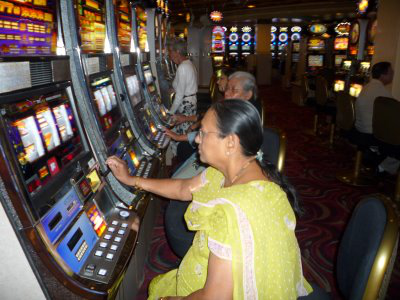

In [35]:
x = indoor_captions[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## Food-101k

In [36]:
def get_food(rf="../food-101/"):
  food = get_images_in_folder(rf)
  img2label = {idx: {
    "label": [x.split("/")[3].replace("_", " ").title()],
    "path": x
  } for idx, x in enumerate(food)}
  return img2label

In [37]:
img2label_food = get_food()
food_captions = capgen.generate_captions(img2label_food, "food")

Generating captions for food


In [38]:
rnd = np.random.choice(list(food_captions.keys()), size = (10))
print(rnd)

['food_12697' 'food_68343' 'food_79709' 'food_68971' 'food_87107'
 'food_65785' 'food_49434' 'food_47737' 'food_77030' 'food_78963']


picture of ravioli, a food dish


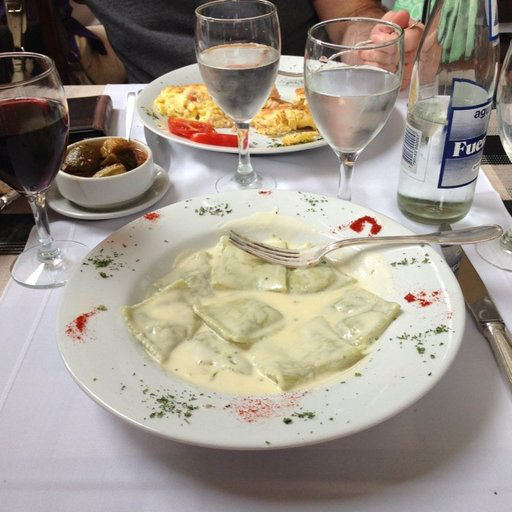

In [39]:
x = food_captions[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## STL-10

In [40]:
def get_stl10(bin_file = "../stl10/stl10_binary/train_y.bin"):
  classes = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]
  with open(bin_file, 'rb') as fobj:
    # read whole file in uint8 chunks
    everything = np.fromfile(fobj, dtype=np.uint8)
  labels = [[classes[x - 1]] for x in everything]

  # sort the images in the STL10 that are already parsed
  stl10 = [x for x in get_images_in_folder("../stl10/stl10_binary/") if "train" in x]
  imgs = {int(x.split("_")[-1].split(".")[0]): x for x in stl10}
  img2label = {
    f"stl_{k}":{
      "path": imgs[k],
      "label": l
    } for k,l in zip(imgs, labels)
  }
  
  return img2label

In [41]:
img2label_stl = get_stl10()
stl10_captions = capgen.generate_captions(img2label_stl, "stl")

Generating captions for stl


In [44]:
rnd = np.random.choice(list(stl10_captions.keys()), size = (10))
print(rnd)

['stl_stl_929' 'stl_stl_1500' 'stl_stl_3870' 'stl_stl_4790' 'stl_stl_2759'
 'stl_stl_3002' 'stl_stl_3284' 'stl_stl_4664' 'stl_stl_2547' 'stl_stl_676']


low res photo of dog


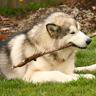

In [45]:
x = stl10_captions[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## SVHN

In [47]:
def get_svhn_data(matfile = '../housenumbers/train/digitStruct.mat'):
  def readInt(intArray, dsFile):
    intRef = intArray[0]
    isReference = isinstance(intRef, h5py.Reference)
    intVal = 0
    if isReference:
      intObj = dsFile[intRef]
      intVal = int(intObj[0])
    else: # Assuming value type
      intVal = int(intRef)
    return intVal
  
  digitmat = h5py.File(matfile, 'r')
  
  print("Loading labels:")
  digit_struct = digitmat["digitStruct"]
  labels_to_return = []
  for _, box in zip(trange(digit_struct["bbox"].shape[0]), digit_struct["bbox"]):
    bbox = digitmat[box[0]] # load bbox using reference
    labels = bbox["label"] # bbox object has the data for bounding box and labels
    lbl = "".join([
      str(readInt(l, digitmat))
      for l in labels
    ])           # create the label string by iterating over all the bboxes
    labels_to_return.append(lbl)

  # now replicate for names
  print("Loading filenames:")
  names = []
  for _, name in zip(trange(digit_struct["name"].shape[0]), digit_struct["name"]):
    name = ''.join(chr(i) for i in digitmat[name[0]])
    names.append(name)
    
  # create final mapping
  dropped =[]
  img2label = {}
  for name, label in zip(names, labels_to_return):
    path = f"../housenumbers/train/{name}"
    if not os.path.exists(path):
      dropped.append(path)
      continue
    img2label[f"housenumber_{name.split('.')[0]}"] = {
      "path": path,
      "label": [label]
    }
    
  return img2label, dropped

In [49]:
img2label_svhn, dropped_svhn = get_svhn_data()
svhn_captions = capgen.generate_captions(img2label_svhn, "svhn")

  0%|          | 78/33402 [00:00<00:42, 778.07it/s]

Loading labels:


  1%|          | 209/33402 [00:00<00:15, 2088.42it/s]

Loading filenames:


100%|██████████| 33402/33402 [00:19<00:00, 1699.57it/s]


Generating captions for svhn


In [50]:
rnd = np.random.choice(list(svhn_captions.keys()), size = (10))
print(rnd)

['svhn_housenumber_26925' 'svhn_housenumber_658' 'svhn_housenumber_12197'
 'svhn_housenumber_23749' 'svhn_housenumber_1571' 'svhn_housenumber_26383'
 'svhn_housenumber_20194' 'svhn_housenumber_19593'
 'svhn_housenumber_30960' 'svhn_housenumber_4161']


a photo with number '299' written in it


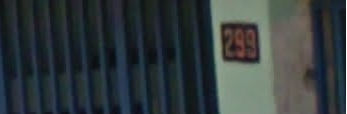

In [51]:
x = svhn_captions[rnd[2]]
print(x["caption"])
Image.open(x["path"])

## OpenImages

In [3]:
def get_open_images_label_names():
  with open("../downsampled-open-images-v4/class-descriptions-boxable.csv", "r") as f:
    open_image_labels = {x.split(",")[0]: x.split(",")[1] for x in f.read().split("\n") if len(x)}
  return open_image_labels

In [4]:
def get_open_images_labels(annotations_path):
  open_image_labels = get_open_images_label_names()
  df = pd.read_csv(annotations_path)
  image_to_labels = {}
  dropped = []
  pbar = trange(len(df.ImageID.unique()))
  path_f = "../downsampled-open-images-v4/256px/"
  if "validation" in annotations_path:
    path_f += "validation/"
  elif "train" in annotations_path:
    path_f += "train-256/"
  elif "test" in annotations_path:
    path_f += "test/"
  for _, (img_id, df_sub) in zip(pbar, df.groupby("ImageID")):
    high_conf = df_sub[df_sub.Confidence == 1].LabelName.values.tolist()
    low_conf = df_sub[df_sub.Confidence != 1].LabelName.values.tolist()
    path = f"{path_f}{img_id}.jpg"
    if not high_conf or not os.path.exists(path):
      dropped.append(img_id)
    image_to_labels["open_images_" + img_id] = {
      "label": [
          [open_image_labels[x] for x in high_conf],
          [open_image_labels[x] for x in low_conf]
      ],
      "path": path
    }
  return image_to_labels, dropped

In [5]:
open_images_img2lab_val, oi_dropped_val = get_open_images_labels(
    "../downsampled-open-images-v4/validation-annotations-human-imagelabels-boxable.csv"
)
oi_val_captions = capgen.generate_captions(open_images_img2lab_val, "open_images")

100%|██████████| 41151/41151 [00:30<00:00, 1341.54it/s]


[['Lion'], ['Human mouth', 'Human nose', 'Human head', 'Human face', 'Human hair', 'Plant', 'Human eye']]


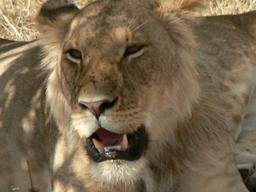

In [7]:
x = open_images_img2lab_val[rnd[2]]
print(x["label"])
Image.open(x["path"])

## Tokenize

In [22]:
from tokenizers.trainers import BpeTrainer
from tokenizers import Tokenizer, decoders
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace

In [11]:
with open("../captions_train.json", "r") as f:
    data = json.load(f)

In [12]:
cleaned = {}
pbar = trange(len(data))
for _, k in zip(pbar, data):
    if os.path.exists(data[k]["path"]):
        cleaned[k] = data[k]

100%|██████████| 2321282/2321282 [00:12<00:00, 185323.08it/s]


In [13]:
print("Before cleaning:", len(data))
print("After cleaning:", len(cleaned))

Before cleaning: 2321282
After cleaning: 2321282


In [14]:
with open("../cleaned_captions.json", "w") as f:
    f.write(json.dumps(cleaned))

In [15]:
with open("../captions.txt", "w") as f:
    f.write("\n".join([data[k]["caption"].lower() for k in data]))

In [23]:
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(vocab_size = 4094, min_frequency=2)
tokenizer.decoder = decoders.WordPiece()
tokenizer.train(files=["../captions.txt"], trainer=trainer)
tokenizer.add_special_tokens(["<|endoftext|>", "<|endofimage|>"]) # making total vocabulary to 8192
tokenizer.save("../tokenizer.json")

In [24]:
output = tokenizer.encode('photo consisting of land vehicle, vehicle, wheel, tire, car' + "<|endoftext|>")
print(output.tokens)

['photo', 'consisting', 'of', 'land', 'vehicle', ',', 'vehicle', ',', 'wheel', ',', 'tire', ',', 'car', '<|endoftext|>']


## Testing

In [1]:
from dalle import *

In [25]:
set_seed(3)

In [26]:
train_split = 0.9995
captions_file = "../cleaned_captions.json"
train_keys, test_keys = DallECaptions.get_split(captions_file=captions_file, train_split=train_split)
dallecaptions_train = DallECaptions(
    captions_file=captions_file,
    tokenizer_path="../tokenizer.json",
    res=128,
    keys=train_keys,
    text_context_len=128,
)
dallecaptions_test = DallECaptions(
    captions_file=captions_file,
    tokenizer_path="../tokenizer.json",
    res=128,
    keys=test_keys,
    text_context_len=128,
)
print("Train Size:", len(dallecaptions_train), "; Test Size:", len(dallecaptions_test))

Tokenizer loaded with vocab size: 4096
Tokenizer loaded with vocab size: 4096
Train Size: 2320121 ; Test Size: 1161


In [30]:
sample = dallecaptions_train[835234]
img = (sample["images"].permute((1, 2, 0)).numpy() * 255).astype(np.uint8)
text = dallecaptions_train.tok.decode(sample["text_tokens"].tolist())

high resolution picture of food and human mouth, plant but not sure high resolution picture of food and human mouth, plant but not sure high resolution picture of food and human mouth, plant but not s


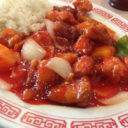

In [31]:
print(text[:200])
Image.fromarray(img)